# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor as LGBMR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
# Your code here
df = pd.read_csv('data_all.zip')

In [3]:
df.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [4]:
df['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [5]:
datos = df.values
datos

array([[36.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

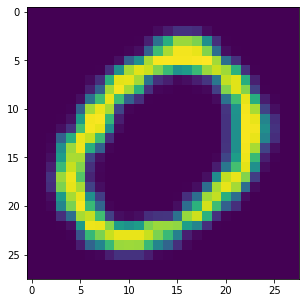

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(datos[45,1:].reshape(28,28))  
plt.show()

In [7]:
letras_may = df[(df['e']>9) & (df['e']<=35)]
letras_min = df[df['e']>35]
numeros = df[df['e']<=9]
lgbmr =LGBMR() 
lin_reg = LinearRegression()
log_reg = LogisticRegression(max_iter=1000)
model_lst = [lgbmr,lin_reg,log_reg] 

In [8]:
X = letras_may.drop('e', axis=1)
y = letras_may['e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = log_reg.score(X_train,y_train)
test_score = log_reg.score(X_test,y_test)
print(train_score,test_score)

0.9650263199872388 0.7344074014994417


/home/jibo16/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
lin_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lin_reg.score(X_train,y_train)
test_score = lin_reg.score(X_test,y_test)
print(train_score,test_score)

0.2933545660125635 -3.1270600320219275e+19


In [11]:
lgbmr.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lgbmr.score(X_train,y_train)
test_score = lgbmr.score(X_test,y_test)
print(train_score,test_score)

0.7789046448955759 0.6890751906931107


* Try to do the same thing with lowercases.

In [12]:
# Your code here
X = letras_min.drop('e', axis=1)
y = letras_min['e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = log_reg.score(X_train,y_train)
test_score = log_reg.score(X_test,y_test)
print(train_score,test_score)

0.9174019494618192 0.6877309682187731


/home/jibo16/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
lin_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lin_reg.score(X_train,y_train)
test_score = lin_reg.score(X_test,y_test)
print(train_score,test_score)

0.41011288824158687 -362300783840095.0


In [15]:
lgbmr.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lgbmr.score(X_train,y_train)
test_score = lgbmr.score(X_test,y_test)
print(train_score,test_score)

0.8424023827546704 0.7389990104453797


* Try to do the same thing with numbers.

In [16]:
# Your code here
X = numeros.drop('e', axis=1)
y = numeros['e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = log_reg.score(X_train,y_train)
test_score = log_reg.score(X_test,y_test)
print(train_score,test_score)

/home/jibo16/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9571804722234213 0.9177313535911602


In [18]:
lin_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lin_reg.score(X_train,y_train)
test_score = lin_reg.score(X_test,y_test)
print(train_score,test_score)

0.530074187562511 -466361214831973.0


In [19]:
lgbmr.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
train_score = lgbmr.score(X_train,y_train)
test_score = lgbmr.score(X_test,y_test)
print(train_score,test_score)

0.9118766059370051 0.882603922696745
